In [3]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
# lending_df.info()
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features
# Separate the y variable, the labels
labels = lending_df[['loan_status']]


# Separate the X variable, the features
features = lending_df.drop(['loan_status'], axis=1)

In [6]:
# Review the y variable Series
labels

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
77531,1
77532,1
77533,1
77534,1


In [7]:
# Review the X variable DataFrame
features

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [8]:
# Check the balance of our target values
labels.value_counts(normalize=True)

# Model is not balanced

loan_status
0              0.967757
1              0.032243
Name: proportion, dtype: float64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression(random_state=1)

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
y_predict = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [12]:
# Print the balanced_accuracy score of the model
metric_bas = balanced_accuracy_score(y_test, y_predict)
print(metric_bas)

0.9521352751368186


In [13]:
# Generate a confusion matrix for the model
test_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_predict), index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

In [25]:
# Print the classification report for the model
test_conf_matrix

,Predicted No,Predicted Yes
Actual No,14926,75
Actual Yes,46,461


[1.99774298e+00 9.97742984e-01 9.95057980e-01 ... 2.41340374e-05
 2.29520364e-05 1.07141565e-05]


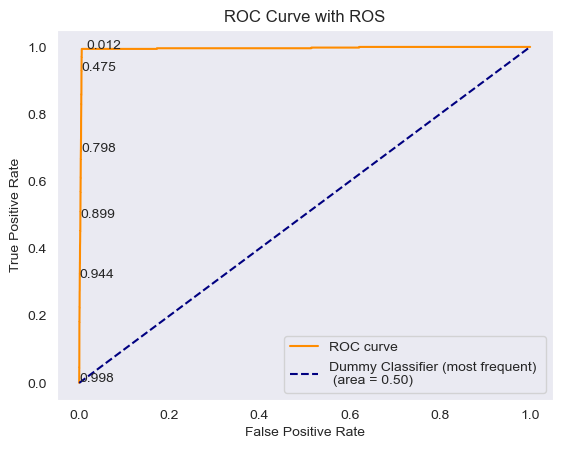

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
print(thresholds)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')

idx = list(range(len(thresholds)))[1:300:50]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(3))

# Plot dummy
clf = DummyClassifier(strategy='most_frequent', random_state=1)
clf.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with ROS')
plt.grid()
plt.legend(loc="lower right")
plt.savefig('Images/ROC_curve.png')
plt.show()
plt.clf()

In [63]:
# Calculate Accuracy, precision, accuracy, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_lr = accuracy_score(y_test, y_predict)
precision_lr = precision_score(y_test, y_predict)
recall_lr = recall_score(y_test, y_predict)
f1_lr = f1_score(y_test, y_predict)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob[:,1])

print(accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr)

0.9921975754449317 0.8600746268656716 0.9092702169625246 0.8839884947267498 0.9948580022344335


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** LR model has a 95% balanced accuracy score. Given the unbalanced nature of the labelset (0.96% to 0.3%), we can disregard accuracy_score of 99%. We have a precision score of 86%, meaning we have roughly 14% FPR. Recall tells us that the model was 91% successful in predicting labels (high risk loans) and F1 tells us about both precision and recall.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [64]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [65]:
# Count the distinct values of the resampled labels data
y_train_ros.value_counts(normalize=True)

loan_status
0              0.5
1              0.5
Name: proportion, dtype: float64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [66]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
ls = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
ls.fit(X_train_ros, y_train_ros)

# Make a prediction using the testing data
y_predict_ros = ls.predict(X_test)
y_pred_prob_ros = ls.predict_proba(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [67]:
# Print the balanced_accuracy score of the model 
bas_ros = balanced_accuracy_score(y_test, y_predict_ros)

accuracy_ros = accuracy_score(y_test, y_predict_ros)
precision_ros = precision_score(y_test, y_predict_ros)
recall_ros = recall_score(y_test, y_predict_ros)
f1_ros = f1_score(y_test, y_predict_ros)
roc_auc = roc_auc_score(y_test, y_pred_prob_ros[:,1])

print(f'Balanced Accuracy Score: {bas_ros}')
print(f'Accuracy: {accuracy_ros}')
print(f'Precision Score: {precision_ros}')
print(f'Recall Score: {recall_ros}')
print(f'F1 Score: {f1_ros}')
print(f'ROC Score: {roc_auc}')

Balanced Accuracy Score: 0.9941749445500477
Accuracy: 0.9942610265669332
Precision Score: 0.8542372881355932
Recall Score: 0.9940828402366864
F1 Score: 0.9188696444849589
ROC Score: 0.994822107191539


In [68]:
# Generate a confusion matrix for the model
ros_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_predict_ros), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

In [69]:
# Print the classification report for the model
ros_conf_matrix

,Predicted No,Predicted Yes
Actual No,14915,86
Actual Yes,3,504


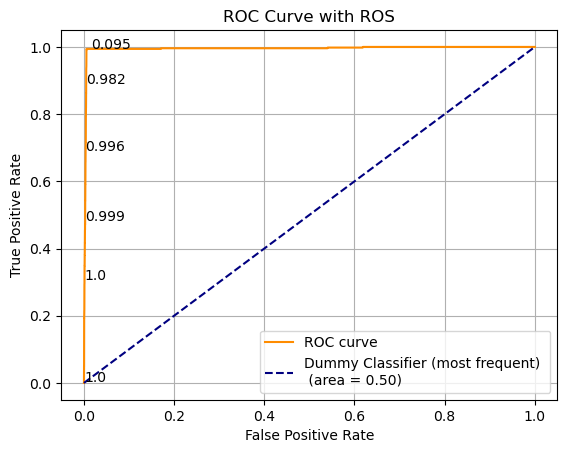

In [70]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_ros[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')

idx = list(range(len(thresholds)))[1:300:50]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(3))

# Plot dummy
clf = DummyClassifier(strategy='most_frequent', random_state=1)
clf.fit(X_train_ros, y_train_ros)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with ROS')
plt.grid()
plt.legend(loc="lower right")
plt.savefig('Images/ROC_curve_w_ros.png')
plt.show()


### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Random oversampling algorithm was successful in improving classification prediction and yielded more favorable results when compared to classify imbalanced labels. In our second model when we employed random oversampling algorithm from imblearn (here called ros) we achieved balanced_accuracy_score and accuracy score of 99%. Although this model experienced a modest reduction in precision, this model overall improved recall and F1 by 9% and 3% respectively. Its worth noting lowered precision is probably acceptable within this context. As a bank attempting to assess the creditworthiness of borrowers, misidentifying high-risk borrowers is is more judicious than identifying low-risk borrowers to help mitigate lending risk.